## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): Акимова Полина Романовна

### Общая информация

__Дата выдачи:__ 05.02.2020

__Дедлайн:__ 15.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а в качестве бонусного задания сможете реализовать алгоритм KNN.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}})\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. Все баллы сверх обязательных (9 в первой части и 12 во второй) идут в бонус. Таким образом, за это домашнее задание можно получить 4 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Для успешного выполнения этой части вам необходимо пройти все `assert`'ы.

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [6]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return round(np.sum(weights*marks))
    # your code here

In [13]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [22]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [26]:
def change_array(array: np.array, number: int) -> np.array:
    # your code here
    array[::3] = number
    return array

In [32]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [33]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [44]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    # your code here
    arr3 = (abs(array1 - array2) < precision).astype('int')
    arr4 = np.arange(1, arr3.size + 1) * arr3
    arr4 = np.delete(arr4, np.where(arr4 == 0)) - 1
    return arr4

In [46]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [48]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [49]:
def block_matrix(block: np.array) -> np.array:
    # your code here
    arr1 = np.hstack((block, block))
    arr2 = np.vstack((arr1,arr1))
    return arr2

In [51]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [58]:
def diag_prod(matrix: np.array) -> int:
    # your code here
    arr1 = np.eye(matrix[0].size).astype('int')
    arr2 = (matrix * arr1).ravel()
    return (np.delete(arr2, np.where(arr2 == 0))).prod()

In [60]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [336]:
def normalize(matrix: np.array) -> np.array:
    # Вычитаем из каждого элемента столбца среднее по столбцу    
    dev_m = matrix - matrix.sum(axis=0) / matrix.shape[0]
    dev_m1 = dev_m ** 2
    dev_m2 = dev_m1.sum(axis = 0) / dev_m1.shape[0]
    # Стандартное отклонение 
    std = dev_m2 ** 0.5
    # Проверка на равенство std нулю. Если ноль, значит, все элементы исходного столбца равны
    # и при нормализации станут равны нулю. Вместо std по столбцу можно взять среднее, чтобы избежать 
    # деления на ноль.     
    check_zeroes_std = (std == 0).astype('int64')
    change = check_zeroes_std * (matrix.sum(axis=0) / matrix.shape[0])
    res = std + change
    norm_matrix = dev_m / res
    return norm_matrix
    # your code here

In [338]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [341]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [84]:
def antiderivative(coefs: np.array) -> np.array:
    # your code here
    coefs2 = np.arange(1, coefs.size + 1)[::-1]
    res = np.hstack((coefs / coefs2, np.array([0])))
    return res

In [86]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [88]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [67]:
def make_symmetric(matrix: np.array) -> np.array:
    # your code here
    return matrix + matrix.T - np.eye(matrix[0].size).astype('int') * matrix

In [69]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [72]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [62]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    # your code here
    matr1 = np.arange(a, b + 1).reshape(1, b - a + 1)
    matr2 = np.ones((m, 1)).astype('int64')
    return np.dot(matr2, matr1)

In [64]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [66]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [75]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    # your code here
    arr_top = (vec1 * vec2).sum()
    arr_bottom = (((vec1 ** 2).sum()) ** 0.5) * (((vec2 ** 2).sum()) ** 0.5)
    return arr_top / arr_bottom

In [76]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [80]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [9]:
# your code here
df = pd.read_csv('train.csv')
df.shape

(891, 12)

In [189]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

Вещественные: PassengerId, Pclass, Age, SibSp, Parch, Fare
Категориальные: Sex, Embarked
Порядковые: Cabin
Бинарные: Survived
Другое(скорее всего категориальные признаки): Name, Ticket
Задача регрессии: зависимость класса от стоимости билета
Задача классификации: определить, к выжившим или к погибшим относится человек в зависимости от возраста и стоимости билета
Задача кластеризации: определить, к какому кластеру относится человек в зависимости от возраста и класса (Pclass)

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [175]:
# your code here
df[df['Survived'] == 1].shape[0] / df.shape[0]

0.3838383838383838

In [176]:
survived = df[df['Survived'] == 1]
s_women = survived[survived['Sex'] == 'female'].shape[0] / survived.shape[0]
print(s_women, 1 - s_women)

0.6812865497076024 0.3187134502923976


In [120]:
#survived[survived['Sex'] == 'male'].shape[0] / survived.shape[0]

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [177]:
# your code here
Pclass_count = df['Pclass'].value_counts()
Pclass_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [178]:
df[df['Pclass'] == 3]['Sex'].value_counts()
# мужчин было больше

male      347
female    144
Name: Sex, dtype: int64

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [179]:
# your code here
print(df['Fare'].min())
print(df['Fare'].max())
print(df['Fare'].mean())

print(df[df['Embarked'] == 'S']['Fare'].min())
print(df[df['Embarked'] == 'S']['Fare'].max())
print(df[df['Embarked'] == 'S']['Fare'].mean())

0.0
512.3292
32.204207968574636
0.0
263.0
27.079811801242233


Text(0, 0.5, 'Кол-во пассажиров')

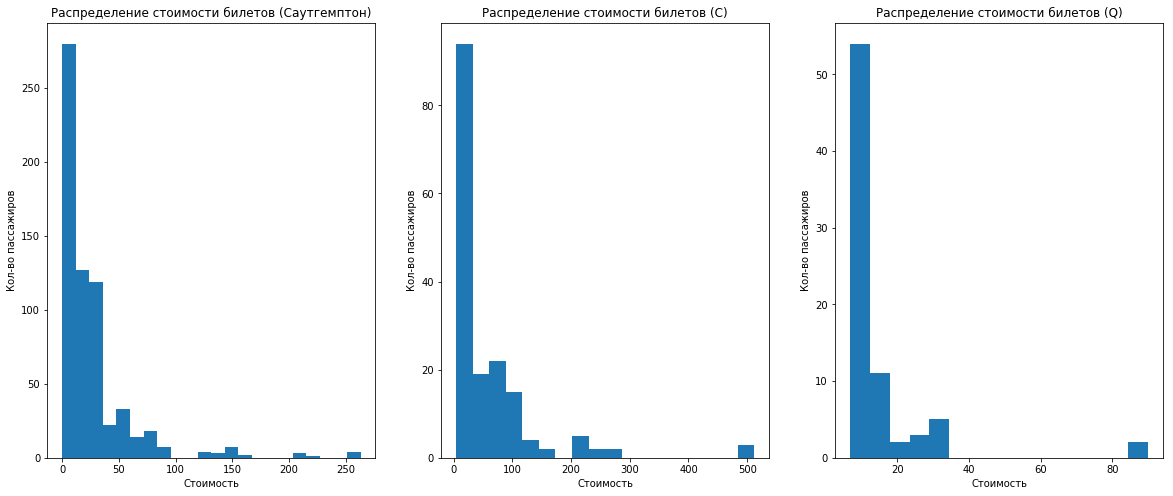

In [180]:
import math
s_bins = round(1 + 3.322 * math.log(df[df['Embarked'] == 'S'].shape[0]))
c_bins = round(1 + 3.322 * math.log(df[df['Embarked'] == 'C'].shape[0]))
q_bins = round(1 + 3.322 * math.log(df[df['Embarked'] == 'Q'].shape[0]))


fig, axs = plt.subplots(1, 3, figsize=[20, 8])
axs[0].hist(df[df['Embarked'] == 'S']['Fare'].values, bins = s_bins)
axs[0].set_title('Распределение стоимости билетов (Саутгемптон)')
axs[0].set_xlabel('Стоимость')
axs[0].set_ylabel('Кол-во пассажиров')
axs[1].hist(df[df['Embarked'] == 'C']['Fare'].values, bins = c_bins)
axs[1].set_title('Распределение стоимости билетов (C)')
axs[1].set_xlabel('Стоимость')
axs[1].set_ylabel('Кол-во пассажиров')
axs[2].hist(df[df['Embarked'] == 'Q']['Fare'].values, bins = q_bins)
axs[2].set_title('Распределение стоимости билетов (Q)')
axs[2].set_xlabel('Стоимость')
axs[2].set_ylabel('Кол-во пассажиров')

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [10]:
# your code here
# Не все. Признаки SibSp и Parch не несут в себе полезной информации, очень часто встречаются нули,
# не очень понятно, могут ли они значительно влиять на выживаемость, как например класс.
# влиять на выживаемость. Признак Ticket категориальный и его сложно закодировать, кроме того, по билету возможно 
# выяснить принадлежность к классу, который важен для определения выживаемости и уже есть в таблице.
# Признак Cabin может быть полезен для определения выживаемости, но он также напрямую зависит от класса и содержит 
# большое количество пропусков.
df = df.drop(['SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [192]:
# your code here
df.isnull().any()
# Пропуски есть, они встречаются в столбцах Age, Embarked

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
Fare           False
Embarked        True
dtype: bool

In [193]:
df[['Age', 'Embarked']].isnull().sum()

Age         177
Embarked      2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [15]:
# your code here
# Пропуски для возраста можно заполнить по медиане для мужчин и женщин. 
# Пропусков в месте посадки всего два, можно заполнить их значением наиболее часто встречающегося признака - S
df.loc[df['Sex'] == 'male', 'Age'] = df.loc[df['Sex'] == 'male', 'Age'].fillna(df[df['Sex'] == 'male']['Age'].median())
df.loc[df['Sex'] == 'female', 'Age'] = df.loc[df['Sex'] == 'female', 'Age'].fillna(df[df['Sex'] == 'female']['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')
df.isnull().any() # пропусков нет

PassengerId       False
Survived          False
Pclass            False
Name              False
Sex               False
Age               False
Fare              False
Embarked          False
Relatives         False
Age/Fare ratio    False
dtype: bool

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

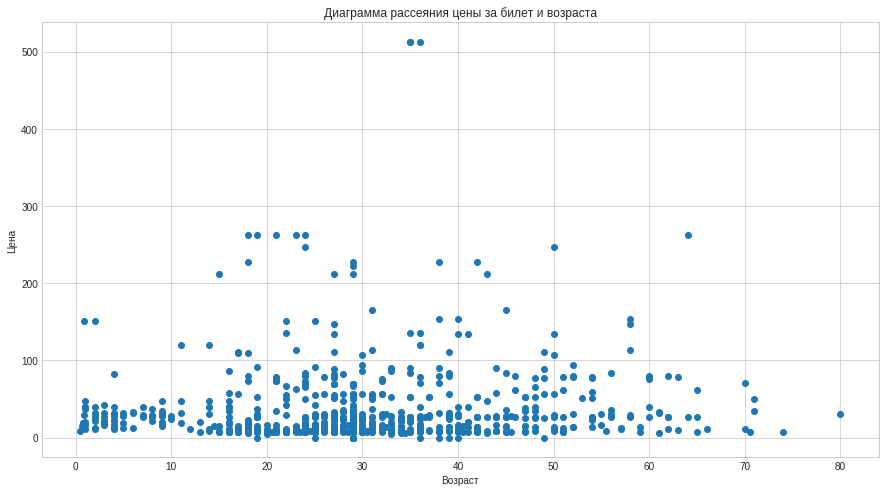

In [211]:
# your code here
mean_fare = df['Fare'].mean()
mean_age = df['Age'].mean()
age = df['Age'].values
fare = df['Fare'].values
dev_age = age * -1 + mean_age
dev_fare = fare * -1 + mean_fare
prod_af = dev_age * dev_fare
corr = prod_af.sum() / ((dev_age ** 2).sum() * (dev_fare ** 2).sum()) ** 0.5
corr # низкая корреляция цены за билет и возраста


plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15, 8])
plt.scatter(age, fare)
plt.title('Диаграмма рассеяния цены за билет и возраста')
plt.xlabel('Возраст')
plt.ylabel('Цена')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [217]:
# your code here
surv_df = df[df['Survived'] == 1]
surv_df.loc[df['Fare'] <= 50].shape[0] / df.loc[df['Fare'] <= 50].shape[0]

0.31874145006839943

In [222]:
temp = df[df['Fare'] > 50]
middle_fare_df = temp[temp['Fare'] <= 100]
middle_fare_df[middle_fare_df['Survived'] == 1].shape[0] / middle_fare_df.shape[0]

0.6542056074766355

In [225]:
high_fare_df = temp[temp['Fare'] > 100]
high_fare_df[high_fare_df['Survived'] == 1].shape[0] / high_fare_df.shape[0]
# В интервале низких цен процент выживших заметно ниже, чем в интервале "средних" цен. Самый высокий процент выживших 
# в интервале высоких цен.

0.7358490566037735

In [227]:
surv_df[surv_df['Pclass'] == 1].shape[0] / df[df['Pclass'] == 1].shape[0]

0.6296296296296297

In [229]:
surv_df[surv_df['Pclass'] == 2].shape[0] / df[df['Pclass'] == 2].shape[0]

0.47282608695652173

In [230]:
surv_df[surv_df['Pclass'] == 3].shape[0] / df[df['Pclass'] == 3].shape[0]
# В первом классе наибольшая выживаемость, в 3 - наименьшая.
# Есть зависимость выживаемости от класса и цены билета

0.24236252545824846

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [14]:
# your code here
new_df = pd.read_csv('train.csv')
df['Relatives'] = new_df['SibSp'] + new_df['Parch'] + 1
df['Age/Fare ratio'] = df['Age'] / df['Fare']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Relatives,Age/Fare ratio
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,3.034483
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,0.533084
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,3.280757
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,0.659134
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,4.347826
5,6,0,3,"Moran, Mr. James",male,29.0,8.4583,Q,1,3.428585
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,1,1.041215
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,5,0.094899
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,S,3,2.425157
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,2,0.465568


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [242]:
# your code here
# Каково процентное соотношение замужних и незамужних женщин на корабле?
df[df['Name'].str.contains('Miss')].shape[0] / df[df['Sex'] == 'female'].shape[0]

0.5796178343949044

In [239]:
df[df['Name'].str.contains('Mrs')].shape[0] / df[df['Sex'] == 'female'].shape[0]

0.410828025477707

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

Text(0, 0.5, 'Кол-во пассажиров')

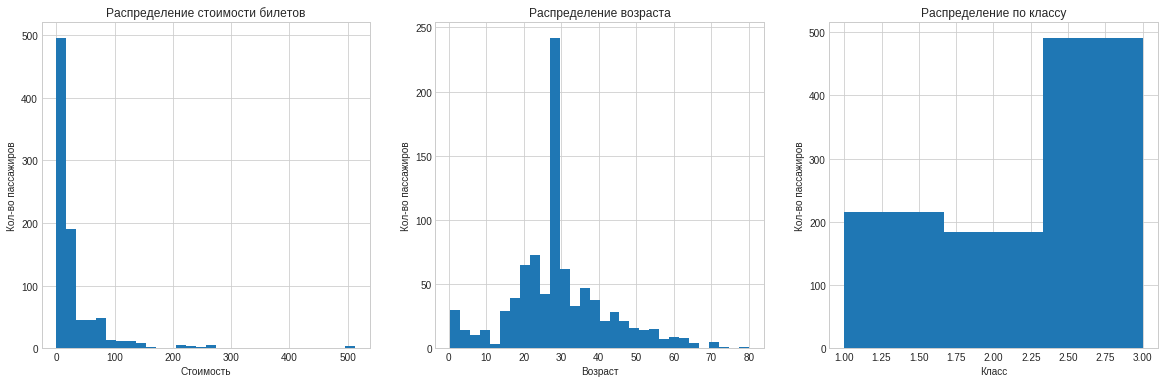

In [269]:
# your code here
# df
fare = df['Fare'].values
age = df['Age'].values
pclass = df['Pclass'].values
fig, axs = plt.subplots(1, 3, figsize=[20, 6])
axs[0].hist(fare, bins = 30)
axs[0].set_title('Распределение стоимости билетов')
axs[0].set_xlabel('Стоимость')
axs[0].set_ylabel('Кол-во пассажиров')
axs[1].hist(age, bins = 30)
axs[1].set_title('Распределение возраста')
axs[1].set_xlabel('Возраст')
axs[1].set_ylabel('Кол-во пассажиров')
axs[2].hist(pclass, bins = 3)
axs[2].set_title('Распределение по классу')
axs[2].set_xlabel('Класс')
axs[2].set_ylabel('Кол-во пассажиров')

Text(0, 0.5, 'Кол-во пассажиров')

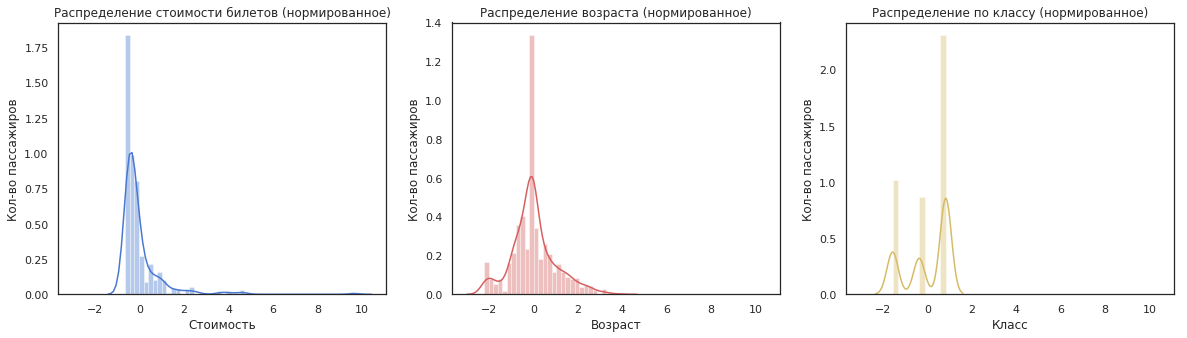

In [297]:
import seaborn as sns
norm_fare = (fare - df['Fare'].mean()) / df['Fare'].std()
norm_age = (age - df['Age'].mean()) / df['Age'].std()
norm_pclass = (pclass - df['Pclass'].mean()) / df['Pclass'].std()



sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.distplot(norm_fare, ax=axes[0])
sns.distplot(norm_age, color='r', ax=axes[1])
sns.distplot(norm_pclass, color='y', ax=axes[2])

axes[0].set_title('Распределение стоимости билетов (нормированное)')
axes[0].set_xlabel('Стоимость')
axes[0].set_ylabel('Кол-во пассажиров')

axes[1].set_title('Распределение возраста (нормированное)')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Кол-во пассажиров')

axes[2].set_title('Распределение по классу (нормированное)')
axes[2].set_xlabel('Класс')
axes[2].set_ylabel('Кол-во пассажиров')

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [331]:
# your code here
# OHE для места посадки
df['Embarked = S'] = 0
df['Embarked = C'] = 0
df['Embarked = Q'] = 0
df.loc[df['Embarked'] == 'S', 'Embarked = S'] = 1
df.loc[df['Embarked'] == 'C', 'Embarked = C'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked = Q'] = 1
df = df.drop(['Embarked'], axis=1)

# Изменение пола на бинарный признак
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

# 3 KNN своими руками (Бонусное задание: 4 балла)

### 25
В этом задании вам предстоить реализовать метод KNN для задачи классификации. Перед вами интерфейс класса, который вам предстоить реализовать. От вас требуется реализовать методы:
* `__init__(self, n_neighbors)`
* `fit(self, X, y)`
* `predict(self, X)`
* `predict_proba(self, X)`

Все ближайшие соседи должны иметь одинаковые веса при построении предсказания. В качестве метрики используйте евклидово расстояние.

Для поиска ближайших соседей можно воспользоваться готовыми структурами данных из подмодуля `sklearn.neighors`, например `KDTree`. Структуры данных из этого подмодуля принимают на вход массив точек, а потом позволяют делать запросы и быстро находить ближайших соседей.

Для проверки работы вашей реализации примените алгоритм ближайших соседей на датасете из пункта 24.
Какие метрики качества у вас получаются? Сравните свои результаты с результатами KNN из библиотеки sklearn.

In [ ]:
from sklearn.base import BaseEstimator

class MyNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors):
        super().__init__()
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
    
    def predict_proba(self, X):
        pass